# Минимизация гладкой функции

In [1]:
import scipy
from scipy.optimize import minimize
import numpy as np
import math

In [2]:
def f(x) :
    #return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(- x / 2)
    return math.sin(x/5) * math.exp(x/10) + 5 * math.exp(-x/2)

In [3]:
xbeg = np.arange(1, 30, 0.1)

In [4]:
res = minimize(f, 30)

In [5]:
res.x

array([25.88019321])

In [6]:
resBFGS1 = minimize(f, 2, method='BFGS')

In [7]:
resBFGS1.x

array([4.13627628])

In [8]:
resBFGS2 = minimize(f, 30, method='BFGS')
resBFGS2.x

array([25.88019321])

In [9]:
f(resBFGS1.x)

1.7452682903447336

In [10]:
file1 = open("minimize-1.txt", "w")
file1.write("%.2f" % (f(resBFGS1.x)) + ' ' + "%.2f" % (f(resBFGS2.x)))
file1.close()

# Глобальная оптимизация

In [12]:
from scipy.optimize import differential_evolution

In [13]:
result = differential_evolution(f, [(1, 30)])

In [14]:
result.x

array([25.88019709])

In [15]:
result.nit

6

In [16]:
resBFGS2.nit

6

In [17]:
f(result.x)

-11.898894665976426

In [18]:
file2 = open("minimize-2.txt", "w")
file2.write("%.2f" % (f(result.x)))
file2.close()

# Минимизация негладкой функции

In [19]:
def h(x) :
    t = f(x)
    return int(t)

In [20]:
f(0)

5.0

In [21]:
h(0)

5

In [22]:
import matplotlib.pyplot as plt 

In [23]:
vfunc = np.vectorize(h)

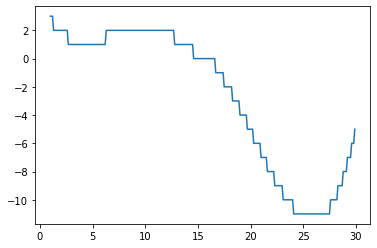

In [24]:
plt.plot(xbeg, vfunc(xbeg))

In [25]:
resBFGS_h = minimize(h, 30, method='BFGS')

In [26]:
resBFGS_h.x

array([30.])

In [32]:
h(resBFGS_h.x)

-5

In [27]:
dif_ev = differential_evolution(h, [(1, 30)])

In [28]:
dif_ev.x

array([24.62238919])

In [33]:
h(dif_ev.x)

-11

In [37]:
file3 = open("minimize-3.txt", "w")
file3.write(str(h(resBFGS_h.x)) + ' ' + str(h(dif_ev.x)))
file3.close()

In [38]:
resBFGS_h2 = minimize(h, 10, method='BFGS')
resBFGS_h2.x

array([10.])